In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
import itertools
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

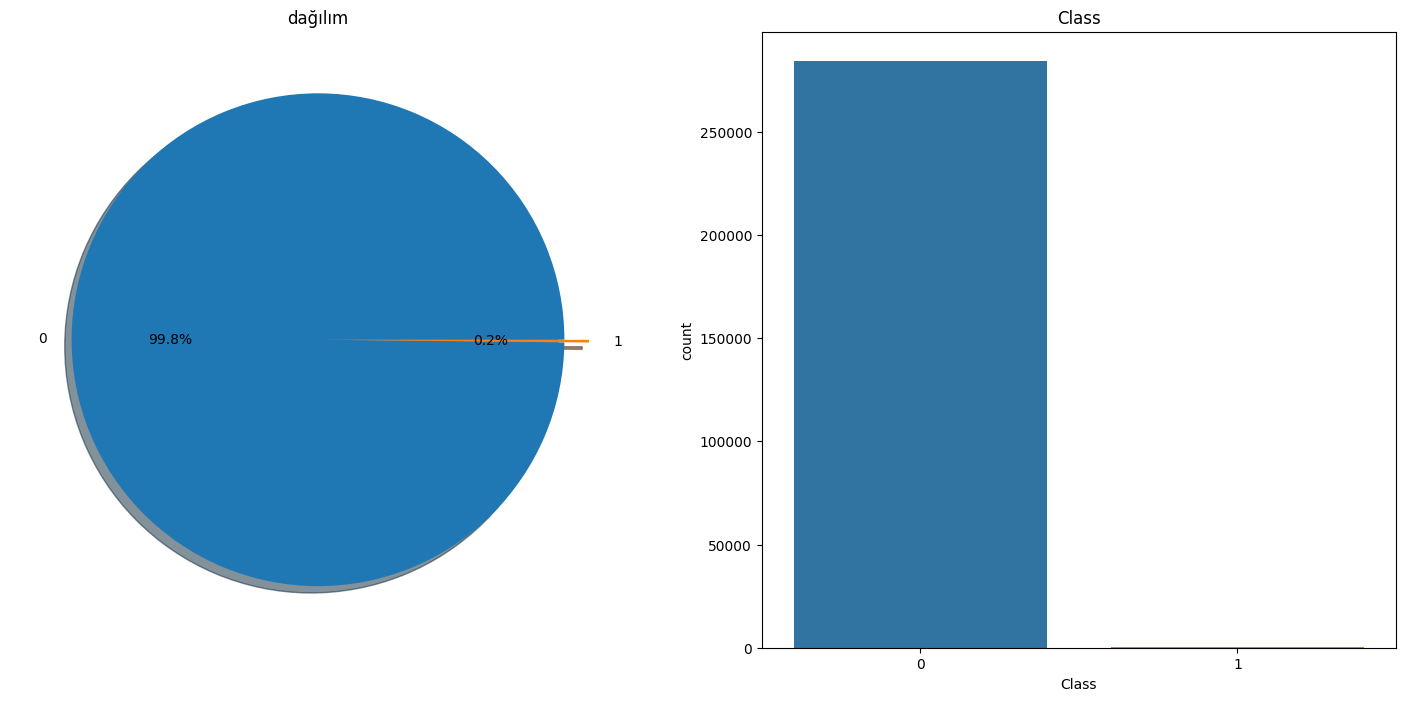

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Class'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')

sns.countplot(x='Class', data=df, ax=ax[1]) # Fix is here: specify x='Class'
ax[1].set_title('Class')

plt.show()


In [12]:
df["Time"]

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [13]:
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [14]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [49]:
model = LogisticRegression(random_state=123456)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.999


c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


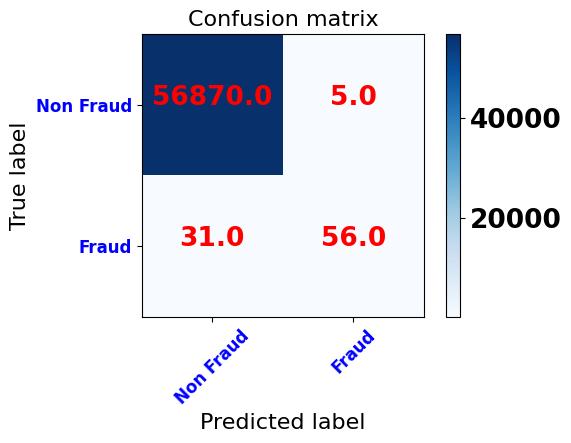

In [50]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

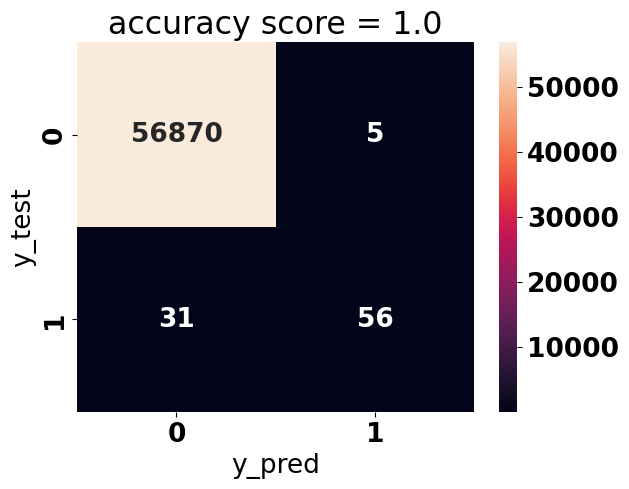

In [39]:
def plot_confusion_matrix(y_test,y_pred):
    acc = round(accuracy_score(y_test,y_pred),2)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(f"accuracy score = {acc}")
    plt.show()
    
plot_confusion_matrix(y_test,y_pred)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.92      0.64      0.76        87

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



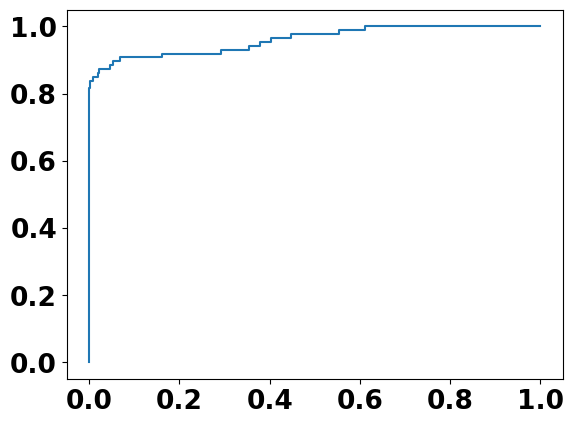

In [20]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr)
    plt.show()
    pass

generate_auc_roc_curve(model, X_test)

In [21]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Curve with Area Under the curve = %.3f"%auc)

AUC ROC Curve with Area Under the curve = 0.961


In [23]:
y_train.value_counts()

Class
0    227440
1       405
Name: count, dtype: int64

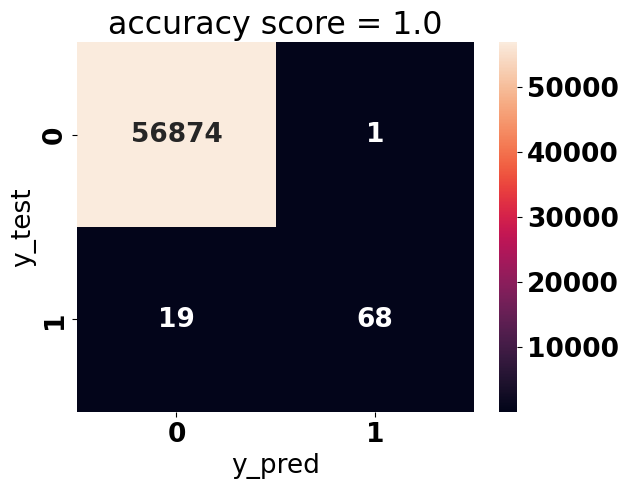

In [37]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(depth=5,iterations=500,learning_rate=0.1,verbose=False)
ctb.fit(X_train, y_train)
y_pred2 = ctb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.3f"%(accuracy))

def plot_confusion_matrix(y_test,y_pred):
    acc = round(accuracy_score(y_test,y_pred),2)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(f"accuracy score = {acc}")
    plt.show()
    
plot_confusion_matrix(y_test,y_pred2)

In [40]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)

In [41]:
y_randomover.value_counts()

Class
0    227440
1    227440
Name: count, dtype: int64

Accuracy: 0.999


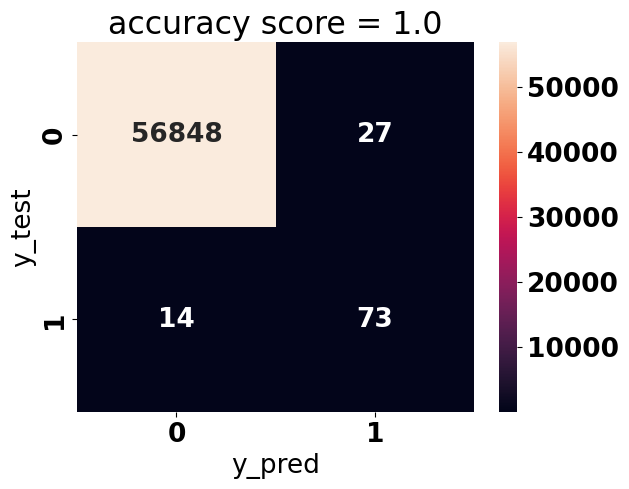

In [43]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(depth=5,iterations=500,learning_rate=0.1,verbose=False)
ctb.fit(X_randomover, y_randomover)
y_pred3 = ctb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.3f"%(accuracy))

def plot_confusion_matrix(y_test,y_pred):
    acc = round(accuracy_score(y_test,y_pred),2)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(f"accuracy score = {acc}")
    plt.show()
    
plot_confusion_matrix(y_test,y_pred3)

In [52]:
model.fit(X_randomover, y_randomover)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.977%


c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


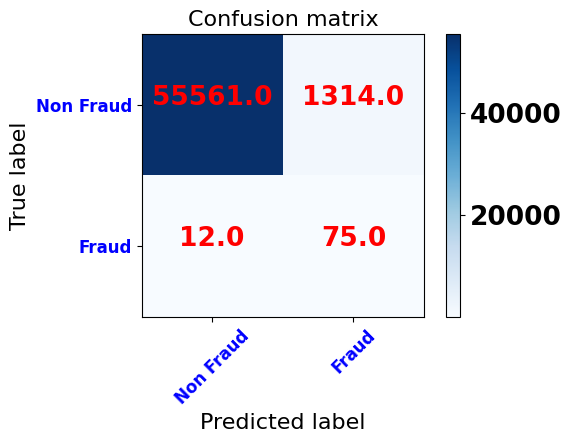

In [53]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.86      0.10        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



In [58]:
y_train.value_counts()

Class
0    227440
1       405
Name: count, dtype: int64

In [62]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '8'

In [63]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [64]:
y_smote.value_counts()

Class
0    227440
1    227440
Name: count, dtype: int64

In [65]:
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.975%


c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


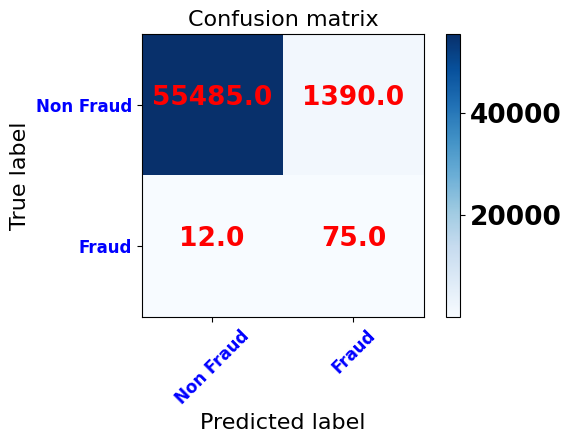

In [66]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.86      0.10        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



In [68]:
y_train.value_counts()

Class
0    227440
1       405
Name: count, dtype: int64

In [69]:
from imblearn.under_sampling import RandomUnderSampler
# transform the dataset
ranUnSample = RandomUnderSampler()
X_ranUnSample, y_ranUnSample = ranUnSample.fit_resample(X_train, y_train)

In [70]:
y_ranUnSample.value_counts()


Class
0    405
1    405
Name: count, dtype: int64

In [71]:
model.fit(X_ranUnSample, y_ranUnSample)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.971%


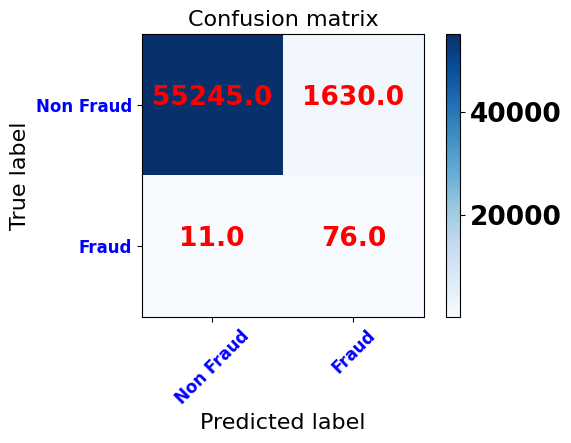

In [72]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56875
           1       0.04      0.87      0.08        87

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



Accuracy: 0.971


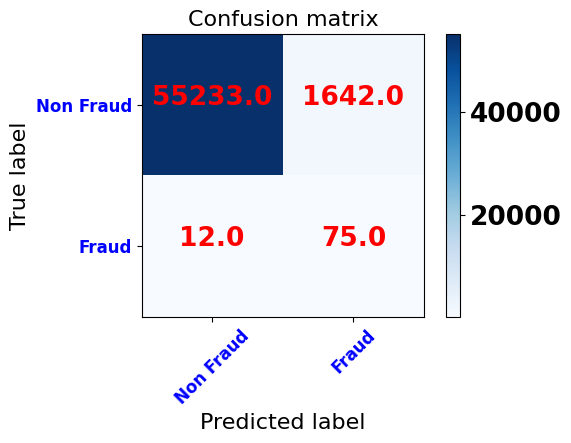

In [89]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(depth=6,iterations=500,learning_rate=0.1,verbose=False)
ctb.fit(X_ranUnSample, y_ranUnSample)
y_pred3 = ctb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.3f"%(accuracy))

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred3), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

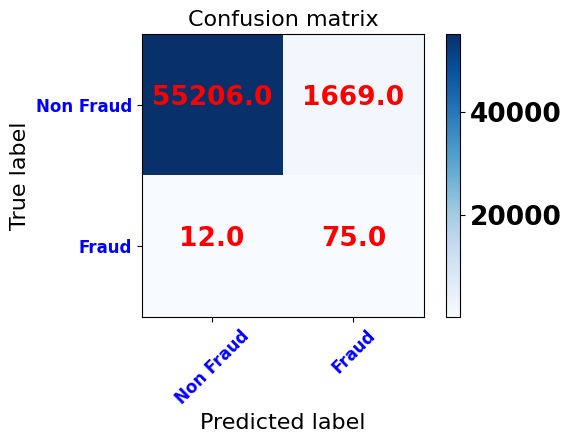

In [78]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56875
           1       0.04      0.86      0.08        87

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962



Accuracy: 0.998


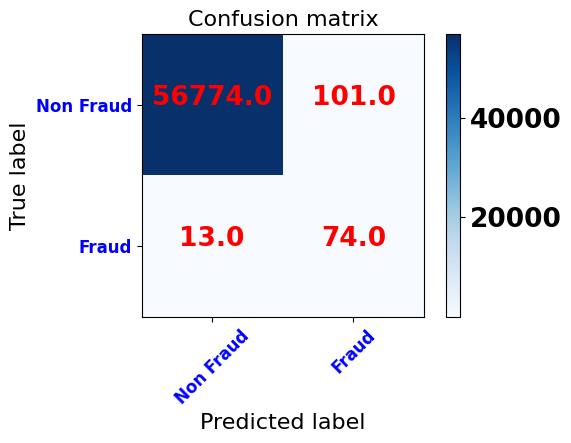

In [79]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(depth=5,iterations=500,learning_rate=0.1,verbose=False)
ctb.fit(X_smote, y_smote)
y_pred3 = ctb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.3f"%(accuracy))

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred3), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Accuracy: 0.942


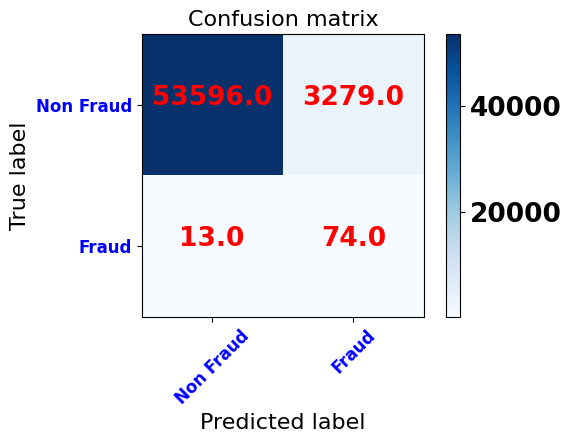

In [86]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=3)  # version=1, 2 veya 3 olabilir

X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

from catboost import CatBoostClassifier
ctb = CatBoostClassifier(depth=5,iterations=500,learning_rate=0.1,verbose=False)
ctb.fit(X_resampled, y_resampled)
y_pred3 = ctb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.3f"%(accuracy))

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred3), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

Accuracy: 1.000


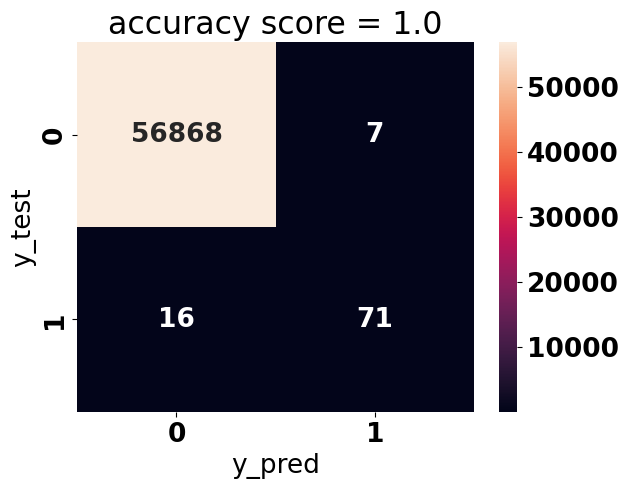

In [95]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(depth=5,iterations=500,learning_rate=0.1,verbose=False,class_weights=[1,100])
ctb.fit(X_train, y_train)
y_pred2 = ctb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.3f"%(accuracy))

def plot_confusion_matrix(y_test,y_pred):
    acc = round(accuracy_score(y_test,y_pred),2)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(f"accuracy score = {acc}")
    plt.show()
    
plot_confusion_matrix(y_test,y_pred2)

In [92]:
y_train.value_counts()

Class
0    227440
1       405
Name: count, dtype: int64

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [107]:
y_train = y_train.replace({0:1,1:0})

In [108]:
y_test = y_test.replace({0:1,1:0})

In [109]:
y_train.value_counts()

Class
1    227440
0       405
Name: count, dtype: int64

In [110]:
X_train_normal = X_train[y_train==1]
X_test_normal = X_test[y_test==1]

X_train_anomaly = X_train[y_train==0]
X_test_anomaly = X_test[y_test==0]

In [111]:
X_train_normal.iloc[0]

Time      0.962124
V1        1.973992
V2       -0.010080
V3       -0.514396
V4        1.388984
V5       -0.356308
V6       -0.776334
V7       -0.101026
V8       -0.094534
V9        0.839474
V10       0.176736
V11      -1.065293
V12      -0.023179
V13      -1.051031
V14       0.346050
V15       0.073413
V16       0.086780
V17      -0.391377
V18      -0.553276
V19      -0.129039
V20      -0.345591
V21      -0.471169
V22      -1.281131
V23       0.490689
V24      -0.087436
V25      -0.438570
V26      -1.159153
V27       0.030442
V28      -0.032138
Amount   -0.265633
Name: 275543, dtype: float64

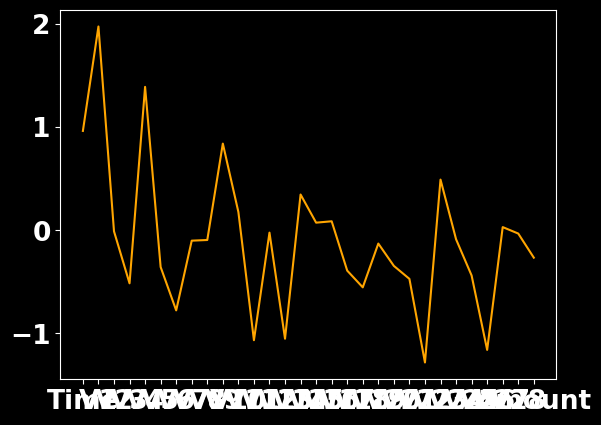

In [112]:
plt.style.use('dark_background')
plt.plot(X_train_normal.iloc[0],"-",color="orange")

In [113]:
mdl = keras.Sequential()

mdl.add(layers.Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
mdl.add(layers.Dense(64,activation='relu'))
mdl.add(layers.Dense(32,activation='relu'))
mdl.add(layers.Dense(64,activation='relu'))
mdl.add(layers.Dense(128,activation='relu'))
mdl.add(layers.Dense(X_train.shape[1],activation='sigmoid'))

mdl.compile(optimizer='adam',loss='mse')
mdl.fit(X_train_normal,X_train_normal, epochs=10,batch_size=10)

Epoch 1/10
22744/22744 [==============================] - 56s 2ms/step - loss: 1.1093
Epoch 2/10
22744/22744 [==============================] - 58s 3ms/step - loss: 1.0808
Epoch 3/10
22744/22744 [==============================] - 60s 3ms/step - loss: 1.0758
Epoch 4/10
22744/22744 [==============================] - 59s 3ms/step - loss: 1.0720
Epoch 5/10
22744/22744 [==============================] - 58s 3ms/step - loss: 1.0710
Epoch 6/10
22744/22744 [==============================] - 55s 2ms/step - loss: 1.0686
Epoch 7/10
22744/22744 [==============================] - 56s 2ms/step - loss: 1.0683
Epoch 8/10
22744/22744 [==============================] - 60s 3ms/step - loss: 1.0679
Epoch 9/10
22744/22744 [==============================] - 55s 2ms/step - loss: 1.0675
Epoch 10/10
22744/22744 [==============================] - 55s 2ms/step - loss: 1.0612


In [114]:
X_pred = mdl.predict(X_train_normal)
train_mae = keras.metrics.mean_absolute_error(X_train_normal,X_pred).numpy()
train_mae

7108/7108 [==============================] - 8s 1ms/step


array([0.36418864, 0.44006702, 0.51684636, ..., 0.47504458, 0.19953585,
       0.26394698], dtype=float32)

(array([2.27108e+05, 2.83000e+02, 3.90000e+01, 7.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.10367417,  3.56441426,  7.02515411, 10.4858942 , 13.94663429,
        17.40737534, 20.86811447, 24.32885551, 27.78959465, 31.25033569,
        34.71107483]),
 <BarContainer object of 10 artists>)

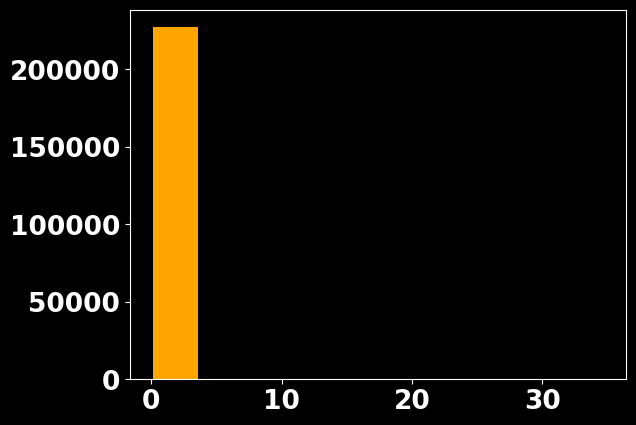

In [115]:
plt.hist(train_mae,color='orange')

In [116]:
thr = train_mae.mean() + train_mae.std()
thr

0.77987504

In [117]:
X_pred_test = mdl.predict(X_test)
test_mae = keras.metrics.mean_absolute_error(X_test,X_pred_test).numpy()
test_mae.shape

1781/1781 [==============================] - 2s 1ms/step


(56962,)

In [118]:
ypred = np.zeros(test_mae.shape)
ypred[test_mae < thr] =1

In [119]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score

print(accuracy_score(y_test,ypred))
print(recall_score(y_test,ypred))
print(roc_auc_score(y_test,ypred))

0.9390997507110003
0.9392527472527472
0.8891666035114311


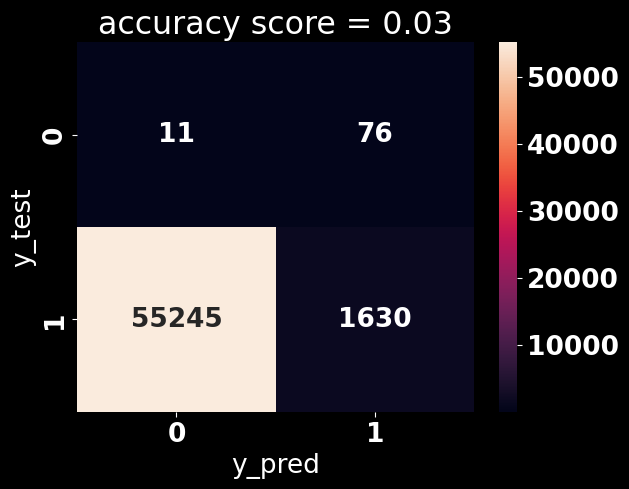

In [120]:
plot_confusion_matrix(y_test,y_pred)

In [126]:
pd.Series(y_pred).value_counts()

0    55256
1     1706
Name: count, dtype: int64

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.13      0.00        87
           1       0.96      0.03      0.06     56875

    accuracy                           0.03     56962
   macro avg       0.48      0.08      0.03     56962
weighted avg       0.95      0.03      0.06     56962

